In [5]:
import torch
torch.cuda.empty_cache() 

In [6]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [7]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [8]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [9]:
import pandas as pd
from PIL import Image as ima
import warnings

In [10]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Add function def show_anns (borrowed from one of the Jupyter notebooks).
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

In [11]:
# from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
# sam = sam_model_registry["vit_h"](checkpoint="/home/yelhe/data/sam/sam_vit_h_4b8939.pth")
# mask_generator = SamAutomaticMaskGenerator(sam)
# # image4 = cv2.imread("/home/yelhe/data/fig/04.jpg")
# # image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
# # masks4 = mask_generator.generate(image4)
# # print(len(masks4))
# # plt.figure(figsize = (15,15))
# # plt.imshow(image4)
# # show_anns(masks4)
# # plt.axis('off')
# # plt.show

In [12]:
from pathlib import Path

### Data preparation

In [13]:
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [14]:
# koord.head()
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'

In [15]:
# Import images into a list
images = [cv2.imread(file) for file in glob.glob("/home/yelhe/data/gsv/GSV_filtered/*.jpg")]


In [16]:

gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []

nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [17]:
print(len(gsv_image1), len(gsv_image2), len(gsv_image3), len(gsv_image4))
# len(gsv_image2)
# len(gsv_image3)

295 295 295 295


In [18]:
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]

### Functions preparation

In [19]:
def convert_mask(masks):
    mb01 = []
    mb02 = []
    mb = []
    n = len(masks)
    for i in range(0, n):
        mb01.append(masks[i]['segmentation'])
    for i in range(0, n):
        mb02.append(mb01[i]*1)
    for i in range(0, n):
        mb.append(mb02[i].astype('uint8'))
    return mb

In [20]:
def output_mask(im):
    im1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    mask_r = mask_generator.generate(im1)
    mask_c = convert_mask(mask_r)
    return mask_c
    

In [21]:
# mask1 = []
# mask2 = []
# mask3 = []
# mask4 = []

In [22]:
## Run automatical generation of masks for all images

# for i in range(0, 294):
# for i in range(201, 295):
#     m1 = gsv_image1[i]
#     om1 = output_mask(m1)
#     mask1.append(om1)
#     np.save('/home/yelhe/data/gsv_output/' + n1[i] + '.npy', mask1[i], allow_pickle=True)
#     m2 = gsv_image2[i]
#     om2 = output_mask(m2)
#     mask2.append(om2)
#     np.save('/home/yelhe/data/gsv_output/' + n2[i] + '.npy', mask2[i], allow_pickle=True)
#     m3 = gsv_image3[i]
#     om3 = output_mask(m3)
#     mask3.append(om3)
#     np.save('/home/yelhe/data/gsv_output/' + n3[i] + '.npy', mask3[i], allow_pickle=True)
#     m4 = gsv_image4[i]
#     om4 = output_mask(m4)
#     mask4.append(om4)
#     np.save('/home/yelhe/data/gsv_output/' + n4[i] + '.npy', mask4[i], allow_pickle=True)
#     print(i)

In [23]:
# i1 = gsv_image1[0]
# i2 = gsv_image2[0]
# i3 = gsv_image3[0]
# i4 = gsv_image4[0]
# i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)
# i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
# i3 = cv2.cvtColor(i3, cv2.COLOR_BGR2RGB)
# i4 = cv2.cvtColor(i4, cv2.COLOR_BGR2RGB)
# m1 = mask_generator.generate(i1)
# m2 = mask_generator.generate(i2)
# m3 = mask_generator.generate(i3)
# m4 = mask_generator.generate(i4)


In [24]:
# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour(image, mask, i):
    image_masked = cv2.bitwise_and(image,image,mask = mask[i])
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 1:
        contour_f = contours
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if len(contours[i]) > 80:
                contour_f.append(contours[i])
    # print("filtered", "len", len(contour_f), contour_f)
    # Plotting the filtered contour
    # -1 is the contourIdx, (0,255,0) is color, 3 is the thickness
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    img_con = cv2.drawContours(image_masked, contour_f, -1, (0,255,0), 3) 
    plt.figure(figsize = (15,15))
    plt.imshow(img_con)
    plt.axis('on')
    plt.show
    return contour_f

# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ll = [] # length list
    for i in range(0, len(contours)):
          ll.append(len(contours[i]))
    maxl = max(ll)
    maxindex = ll.index(maxl)
    if (len(contours) == 1):
        contour_f = contours
    # elif (maxl < 80):
    #      contour_f = contours[maxindex]
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if (len(contours[i]) >= 80):
                contour_f.append(contours[i])
            else:
                contour_f = contour_f
        # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [25]:
# Contour geometric attributes result
# For each contour
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    M = cv2.moments(c) # Moments
    area = cv2.contourArea(c) # Area 
    if (M['m00'] != 0):
        cx = int(M['m10']/M['m00']) # Centroid
        cy = int(M['m01']/M['m00'])
    else:
        cx = x
        cy = y
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    if (hull_area != 0):
        solidity = float(area)/hull_area
    else:
        solidity = 0
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c)
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside    
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside
    }
          

In [26]:
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        isc = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        ed = []
        rate = []
        per = []
        isc = []
        ism = []
        for i in range(0, len(gal)):
            isc.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            isc.append(gal[0]['is_cen_inside'])
            ism.append(gal[0]['is_mce_inside'])
        isconvex = np.all(isc)
        area = np.mean(al, axis = 0)
        aspect_ratio_wh_s = np.mean(asps, axis = 0)
        extent_s = np.mean(exts, axis = 0)
        solidity = np.mean(sol, axis = 0)
        aspect_ratio_wh = np.mean(asp, axis = 0)
        extent = np.mean(ext, axis = 0)
        ed = np.mean(ed, axis = 0)
        ratio_ell = np.mean(rate, axis = 0)
        perimeter = np.mean(per, axis = 0)
        is_cen_inside = np.mean(isc, axis = 0)
        is_mce_inside = np.mean(ism, axis = 0)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside
        }
    return ga


In [27]:
# mask file mf
def feature_summary(image, mf):
    # Generate a data frame for masks and attributes
    df = pd.DataFrame()
    df['mask'] = range(1, (len(mf)+1))
    df = df.assign(gmedian = None, rmedian = None, bmedian = None,
                   gmean = None, rmean = None, bmean = None,
                   gstd = None, rstd = None, bstd = None,
                   isconvex = None, area = None, aspect_ratio_wh_s = None,
                   extent_s = None, solidity = None, aspect_ratio_wh = None,
                   extent = None, ed = None, ratio_ell = None,
                   perimeter = None, is_cen_inside = None, is_mce_inside = None)
    mm = [] # masked image
    for i in range(0, len(mf)):
        mm.append(cv2.bitwise_and(image, image, mask = mf[i]))
    mib = []
    mig = []
    mir = []
    for i in range(0, len(mm)):
        mib.append((mm[i][:,:,0])[np.where((mm[i][:,:,0]) != 0)])
        mig.append((mm[i][:,:,1])[np.where((mm[i][:,:,1]) != 0)])
        mir.append((mm[i][:,:,2])[np.where((mm[i][:,:,2]) != 0)])
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore", category=RuntimeWarning)
    #     foo = np.nanmean(x, axis=1)
    for i in range(0, len(mm)):
        df.at[i, 'bmean'] = np.mean(mib[i], axis = 0)
        df.at[i,'gmean'] = np.mean(mig[i], axis = 0)
        df.at[i,'rmean'] = np.mean(mir[i], axis = 0)
        df.at[i,'bmedian'] = np.median(mib[i], axis = 0)
        df.at[i,'gmedian'] = np.median(mig[i], axis = 0)
        df.at[i,'rmedian'] = np.median(mir[i], axis = 0)
        df.at[i,'bstd'] = np.std(mib[i], axis = 0)
        df.at[i,'gstd'] = np.std(mig[i], axis = 0)
        df.at[i,'rstd'] = np.std(mir[i], axis = 0)
    for i in range(0, len(mf)):
        df.at[i, 'isconvex'] = csga(ffpcontour_noplot(image, mf, i))['isconvex']
        df.at[i, 'area'] = csga(ffpcontour_noplot(image, mf, i))['area']
        df.at[i, 'aspect_ratio_wh_s'] = csga(ffpcontour_noplot(image, mf, i))['aspect_ratio_wh_s']
        df.at[i, 'extent_s'] = csga(ffpcontour_noplot(image, mf, i))['extent_s']
        df.at[i, 'solidity'] = csga(ffpcontour_noplot(image, mf, i))['solidity']
        df.at[i, 'aspect_ratio_wh'] = csga(ffpcontour_noplot(image, mf, i))['aspect_ratio_wh']
        df.at[i, 'extent'] = csga(ffpcontour_noplot(image, mf, i))['extent']
        df.at[i, 'ed'] = csga(ffpcontour_noplot(image, mf, i))['ed']
        df.at[i, 'ratio_ell'] = csga(ffpcontour_noplot(image, mf, i))['ratio_ell']
        df.at[i, 'perimeter'] = csga(ffpcontour_noplot(image, mf, i))['perimeter']
        df.at[i, 'is_cen_inside'] = csga(ffpcontour_noplot(image, mf, i))['is_cen_inside']
        df.at[i, 'is_mce_inside'] = csga(ffpcontour_noplot(image, mf, i))['is_mce_inside']
    return df

### Run workflow on generated gsv mask files

In [114]:
# Load all generated mask files

mask1 = []
mask2 = []
mask3 = []
mask4 = []

for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output/' + n1[i] + '.npy', allow_pickle=True)
    mask1.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output/' + n2[i] + '.npy', allow_pickle=True)
    mask2.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output/' + n3[i] + '.npy', allow_pickle=True)
    mask3.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output/' + n4[i] + '.npy', allow_pickle=True)
    mask4.append(m4)


print(len(mask1), len(mask2), len(mask3), len(mask4))

295 295 295 295


In [ ]:
# plt.figure(figsize = (15,15))
# plt.imshow(gsv_image1[0])
# plt.axis('on')
# plt.show

In [32]:
for i in range(0, 295):
    print(i, len(mask1[i]))

0 55
1 77
2 73
3 84
4 76
5 105
6 122
7 120
8 47
9 77
10 63
11 97
12 146
13 105
14 115
15 61
16 57
17 57
18 57
19 56
20 99
21 70
22 74
23 88
24 67
25 56
26 66
27 54
28 61
29 53
30 86
31 59
32 42
33 76
34 62
35 61
36 143
37 107
38 98
39 66
40 80
41 65
42 60
43 82
44 87
45 64
46 147
47 54
48 106
49 83
50 116
51 65
52 68
53 42
54 125
55 77
56 74
57 55
58 86
59 78
60 75
61 76
62 92
63 95
64 111
65 110
66 134
67 82
68 122
69 59
70 94
71 136
72 74
73 76
74 104
75 63
76 56
77 84
78 95
79 94
80 166
81 84
82 84
83 83
84 150
85 80
86 140
87 114
88 88
89 79
90 111
91 47
92 153
93 102
94 79
95 80
96 73
97 73
98 28
99 88
100 70
101 82
102 106
103 105
104 139
105 69
106 139
107 85
108 139
109 85
110 146
111 76
112 90
113 131
114 77
115 84
116 108
117 134
118 104
119 89
120 42
121 88
122 68
123 87
124 123
125 132
126 127
127 123
128 32
129 38
130 90
131 118
132 80
133 191
134 141
135 137
136 138
137 61
138 138
139 105
140 81
141 61
142 105
143 112
144 126
145 50
146 54
147 109
148 92
149 87
150 57
151

In [34]:
# Print the contour numbers in each mask for one image 1[i]
j = 1
print(len(mask1[j]))
print(n1[j])

mb = mask1[j]
ima = gsv_image1[j]
leng = []
for i in range(0, len(mask1[j])):
    leng.append(len(ffpcontour_noplot(ima, mb, i)))
print(leng)

77
999000630186111
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]


In [35]:
# ret, thresh = cv2.threshold((mb[78]*255), 127, 255, 0)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# ll = [] # length list
# for i in range(0, len(contours)):
#     ll.append(len(contours[i]))
# maxl = max(ll)
# maxindex = ll.index(maxl)
# print(maxl)
# print(maxindex)
# print(ll)
# print(len(contours))


In [36]:
### Labelling

4


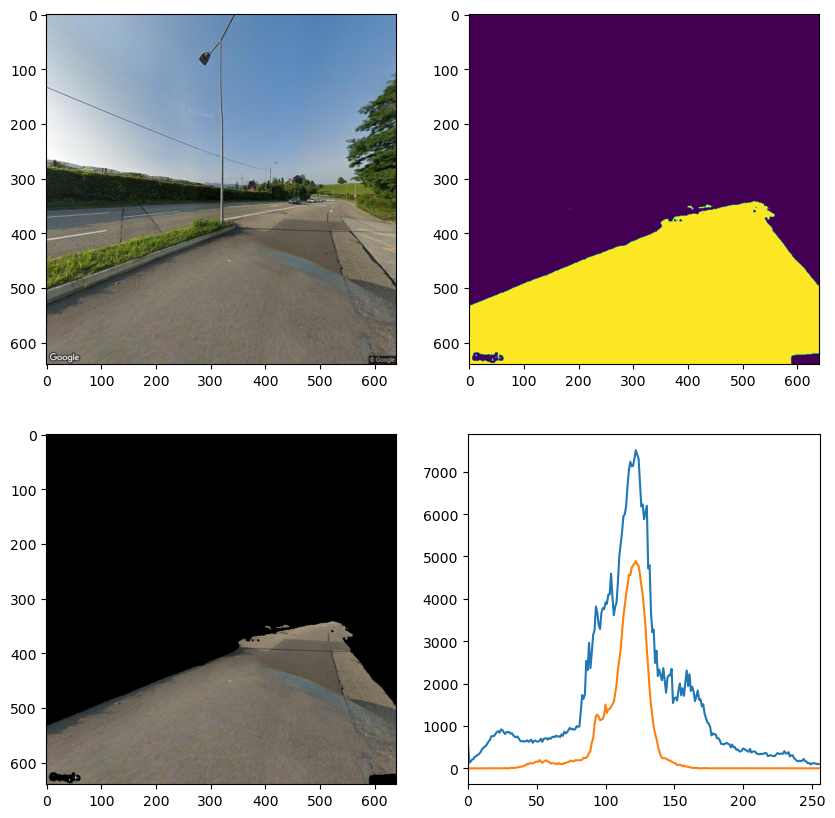

In [37]:

# which image
j = 1
# print(n3[j])
# print(len(mask3[j]))
mb = mask3[j]
ima = gsv_image3[j]



# which mask
# i = i+1
i = 4 
print(i)
maskedimg = cv2.bitwise_and(ima,ima,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([ima],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([ima],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(ima)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [38]:
n1[0]

'999000608525971'

In [39]:
mb1 = mask1[0]

In [40]:
a = cv2.bitwise_and(mb1[0], mb1[38])
np.unique(a)

array([0, 1], dtype=uint8)

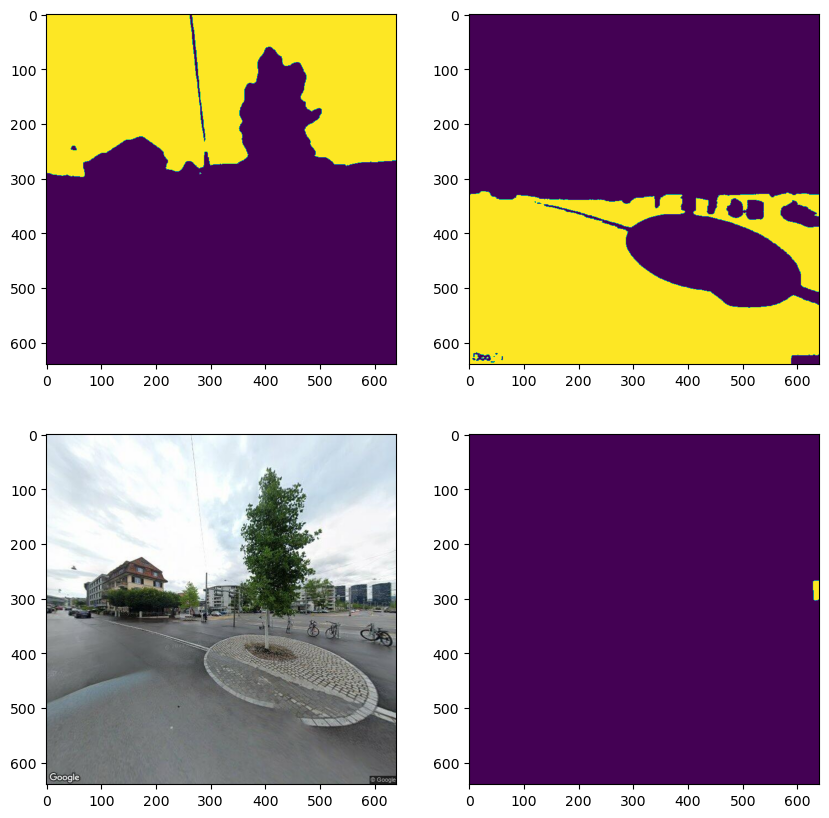

In [41]:
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(mb1[0])
plt.subplot(222), plt.imshow(mb1[4])
plt.subplot(223), plt.imshow(gsv_image1[0])
plt.subplot(224), plt.imshow(mb1[52])
# plt.xlim([0,256])
plt.show()

In [42]:
a = cv2.bitwise_and(mb1[0], mb1[0])
b = cv2.bitwise_xor(mb1[0], mb1[4])
print(cv2.countNonZero(a))
print(cv2.countNonZero(b))

148936
299112


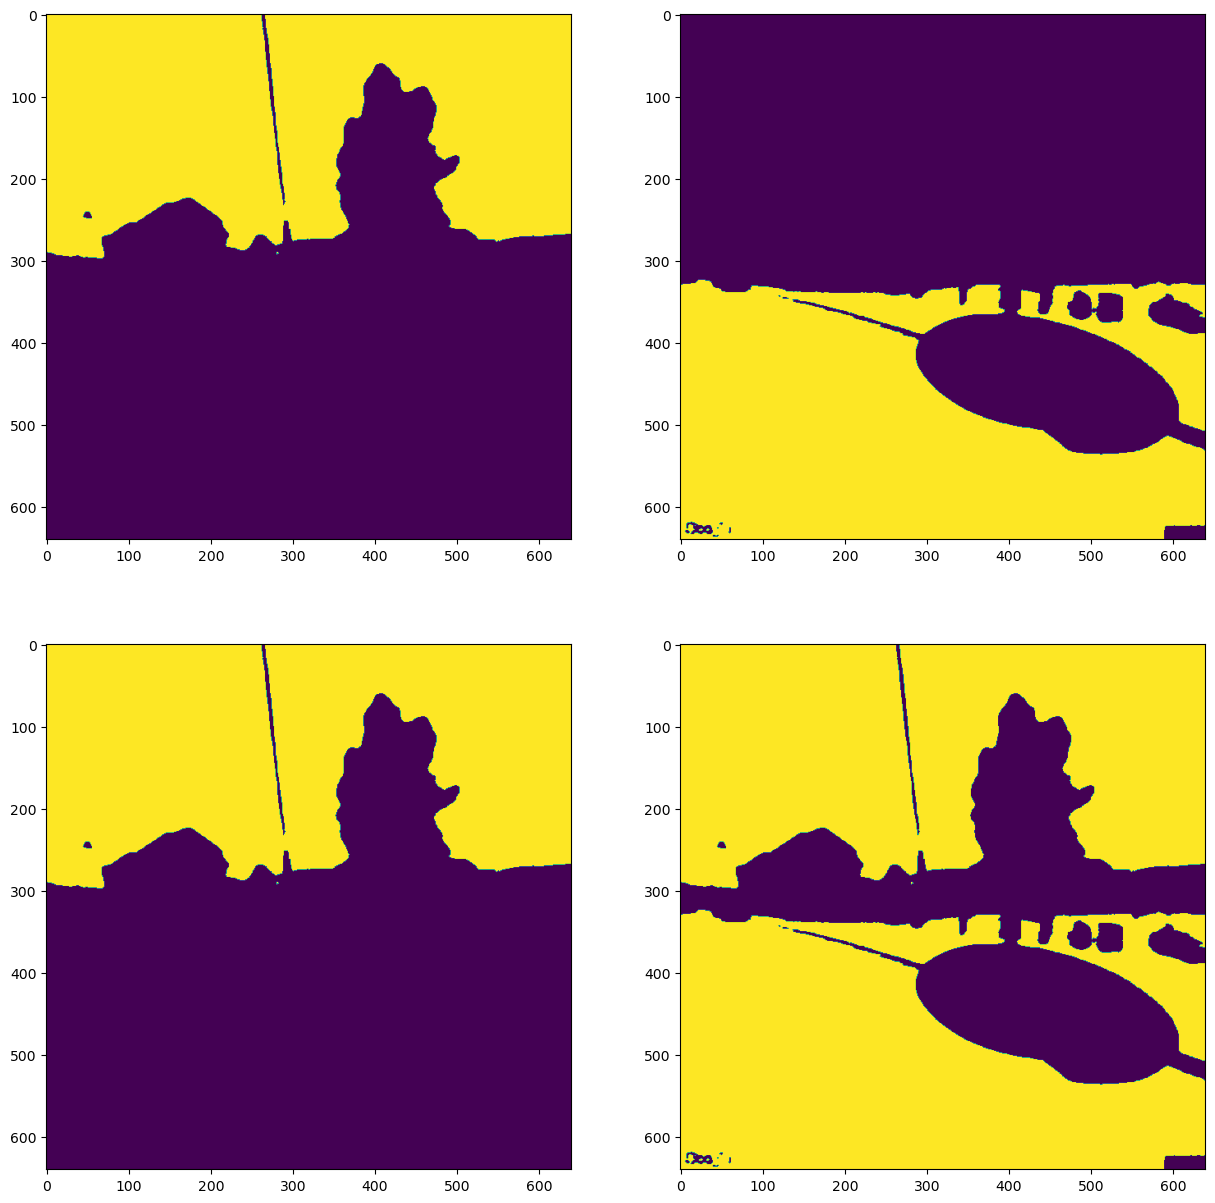

In [43]:
plt.figure(figsize = (15,15))
plt.subplot(221), plt.imshow(mb1[0])
plt.subplot(222), plt.imshow(mb1[4])
plt.subplot(223), plt.imshow(a)
plt.subplot(224), plt.imshow(b)
# plt.xlim([0,256])
plt.show()

In [44]:
mb_new = mb1

In [45]:
c = cv2.bitwise_or(mb_new[1], mb_new[33])
print(cv2.countNonZero(mb_new[1]))
print(cv2.countNonZero(c))

34000
34000


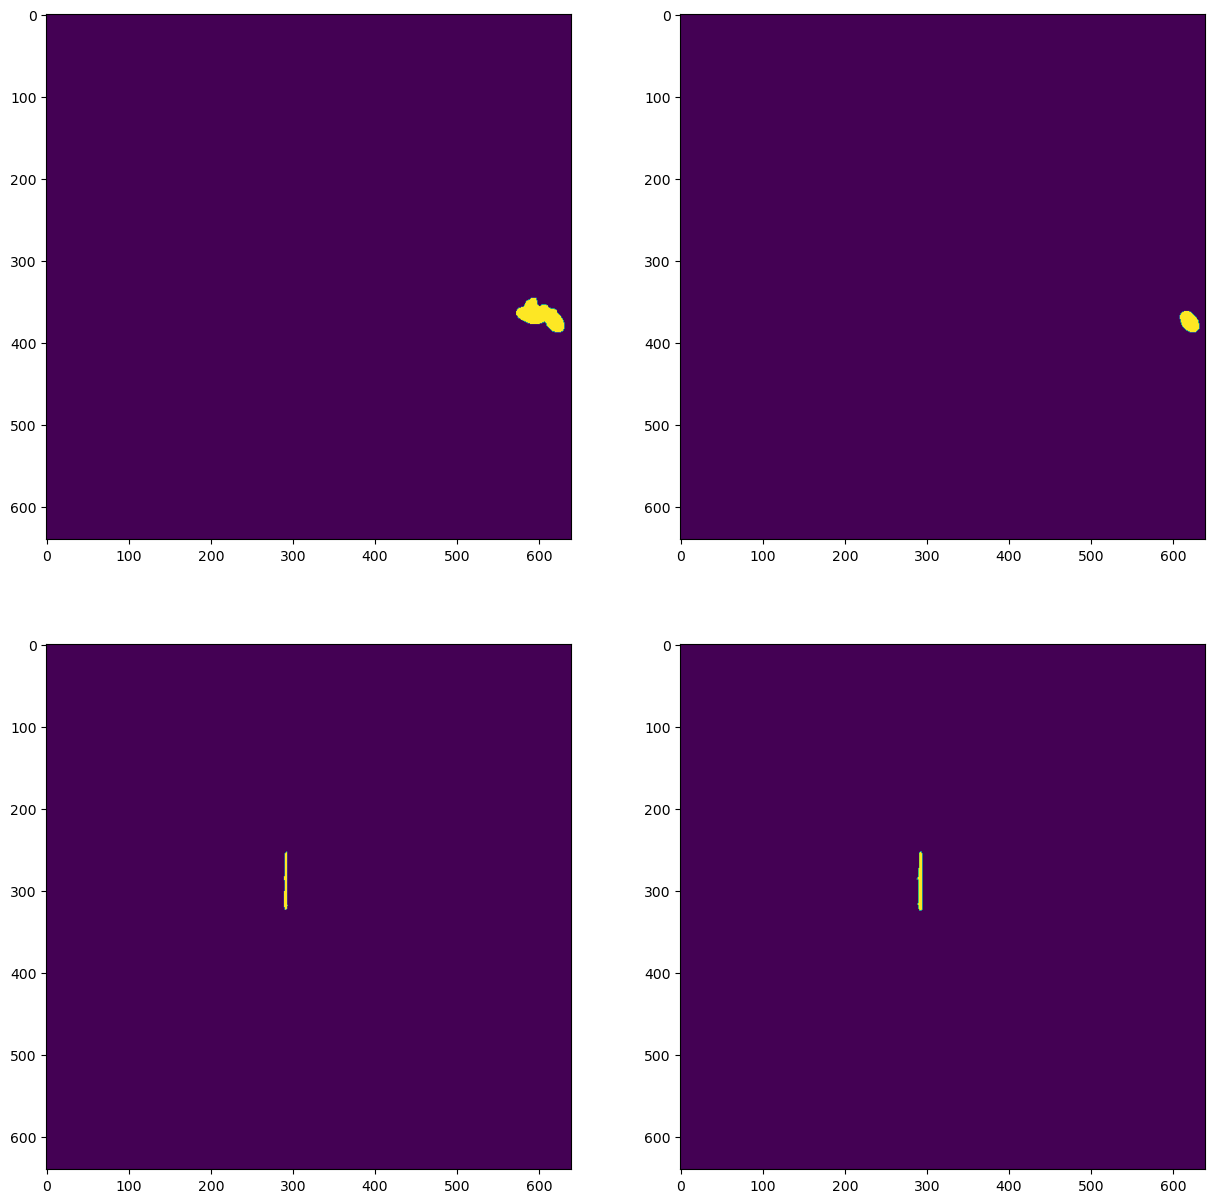

In [46]:
plt.figure(figsize = (15,15))
plt.subplot(221), plt.imshow(mb_new[10])
plt.subplot(222), plt.imshow(mb_new[23])
plt.subplot(223), plt.imshow(mb_new[47])
plt.subplot(224), plt.imshow(mb_new[49])
# plt.xlim([0,256])
plt.show()

In [47]:
def filter_overlap(mask):
    mb_new = mask
    mb_new1 = mask
    for i in range(0, (len(mb_new)-1)):
        for j in range((i+1), len(mb_new)):
            a = cv2.bitwise_and(mb_new[i], mb_new[j])
            al = len(np.unique(a))
            # print(i, j, "len", al)
            if al != 1:
                s1 = cv2.countNonZero(mb_new[i])
                s2 = cv2.countNonZero(mb_new[j])
                b = cv2.bitwise_or(mb_new[i], mb_new[j])
                # print(i,j, "have intersection")
                s3 = cv2.countNonZero(b)
                if s1 >= s2 :
                    # print(i,">", j)
                    if s1 == s3:
                        # print(j, "subset of", i)
                        mb_new1[j] = 0
                else:
                    # print(i,"<", j)
                    if s2 == s3:
                        # print(i, "subset of", j)
                        mb_new1[i] = 0
    emptyl = []
    for i in range(0, len(mb_new)):
        if np.all(mb_new1[i] == 0):
            emptyl.append(i)           
    mb_new1 = np.delete(mb_new1, emptyl, 0)
    # print(len(mask), len(mb_new1))
    return mb_new1


In [71]:
mb2 = filter_overlap(mb1)

In [96]:
print(len(mb1), len(mb2))

55 43


In [48]:
maskf1 = []
for i in range(0, 10):
    print(i, len(mask1[i]))
    m = filter_overlap(mask1[i])
    maskf1.append(m)
    print(i, len(maskf1[i]))

0 55
0 43
1 77
1 60
2 73
2 44
3 84
3 60
4 76
4 46
5 105
5 28
6 122
6 54
7 120
7 92
8 47
8 33
9 77
9 61
10 63
10 42
11 97
11 44
12 146
12 36
13 105
13 51
14 115
14 75
15 61
15 45
16 57
16 23
17 57
17 52
18 57
18 52
19 56
19 44
20 99
20 66
21 70
21 54
22 74
22 53
23 88
23 64
24 67
24 45
25 56
25 34
26 66
26 43
27 54
27 46
28 61
28 46
29 53
29 30
30 86
30 53
31 59
31 52
32 42
32 38
33 76
33 44
34 62
34 52
35 61
35 46
36 143
36 53
37 107
37 62
38 98
38 54
39 66
39 45
40 80
40 41
41 65
41 39
42 60
42 38
43 82
43 31
44 87
44 30
45 64
45 57
46 147
46 44
47 54
47 39
48 106
48 82
49 83
49 46


In [ ]:
for i in range(10, 100):
    print(i, len(mask1[i]))
    m = filter_overlap(mask1[i])
    maskf1.append(m)
    print(i, len(maskf1[i]))

In [ ]:
for i in range(100, 200):
    print(i, len(mask1[i]))
    m = filter_overlap(mask1[i])
    maskf1.append(m)
    print(i, len(maskf1[i]))

In [ ]:
for i in range(100, 295):
    print(i, len(mask1[i]))
    m = filter_overlap(mask1[i])
    maskf1.append(m)
    print(i, len(maskf1[i]))

In [75]:
ma = mask1[5]
maf = maskf1[5]

102


IndexError: index 105 is out of bounds for axis 0 with size 105

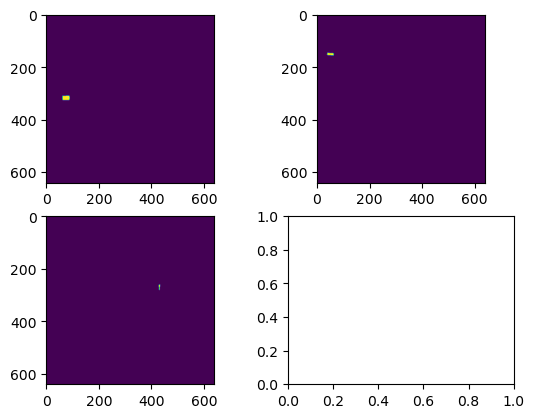

In [113]:
# plt.figure(figsize = (15,15))
#i = 0
# i = i+4
# print(i)
# plt.subplot(221), plt.imshow(ma[i])
# plt.subplot(222), plt.imshow(ma[i+1])
# plt.subplot(223), plt.imshow(ma[i+2])
# plt.subplot(224), plt.imshow(ma[i+3])
# # plt.xlim([0,256])
# plt.show()

In [88]:
cv2.countNonZero(ma[8])

333

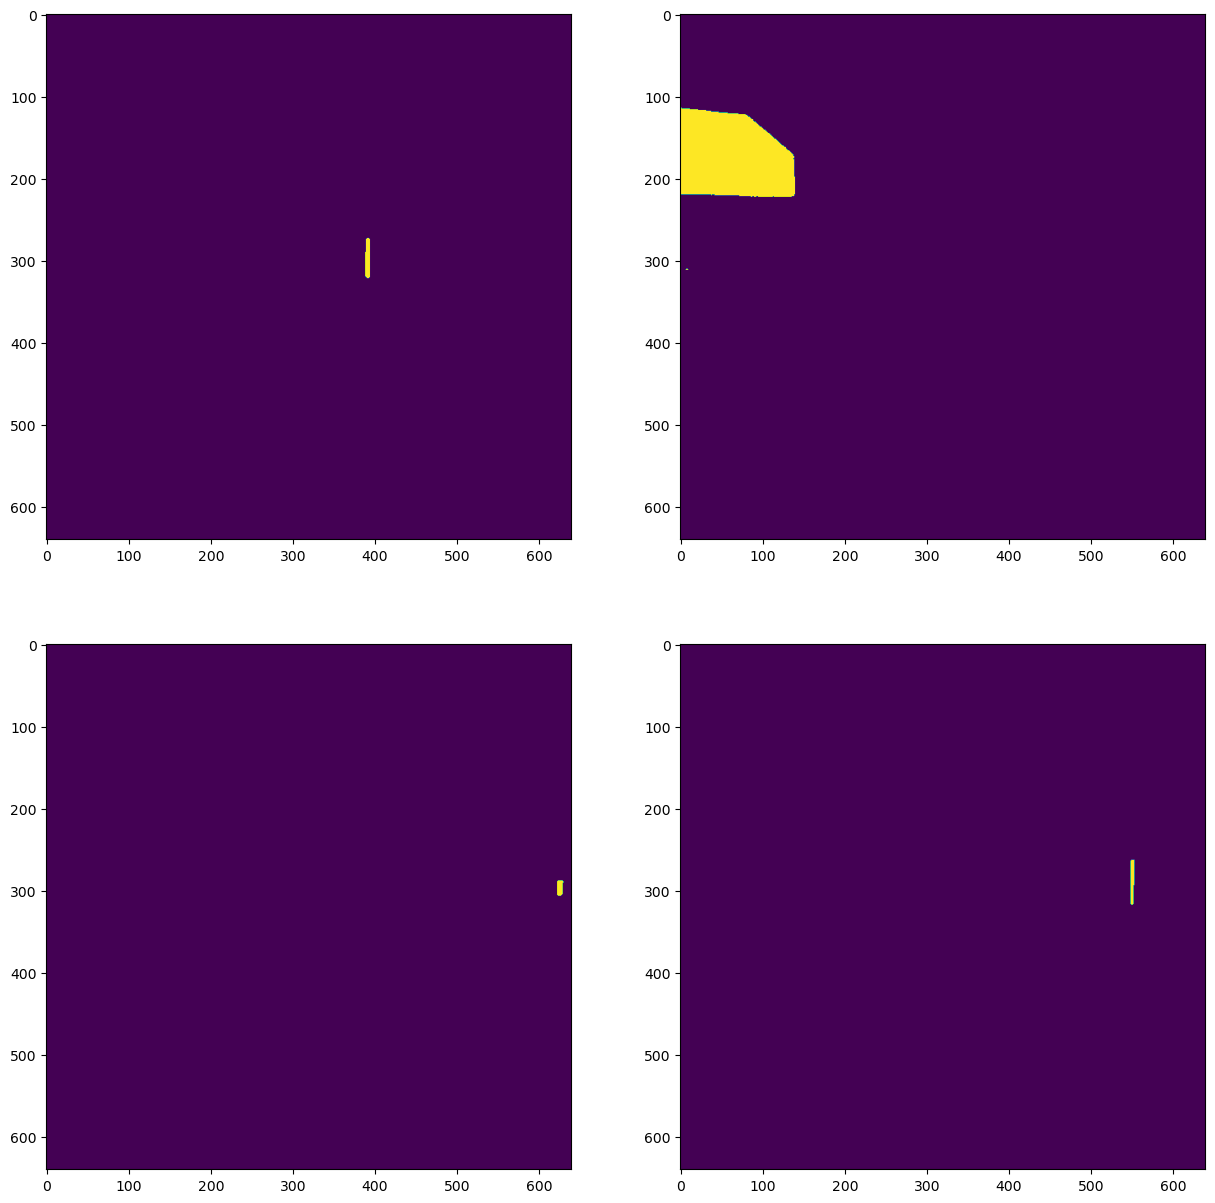

In [62]:
plt.figure(figsize = (15,15))
plt.subplot(221), plt.imshow(maf[20])
plt.subplot(222), plt.imshow(maf[21])
plt.subplot(223), plt.imshow(maf[22])
plt.subplot(224), plt.imshow(maf[23])
# plt.xlim([0,256])
plt.show()

In [55]:
n1[5]

'999000542882091'

In [ ]:
# for i in range(0, 295):
for i in range(0, 10):
    m1 = mask1[i]
    om1 = filter_overlap(m1)
    np.save('/home/yelhe/data/gsv_output_filtered/' + n1[i] + 'f.npy', om1, allow_pickle=True)
    m2 = mask2[i]
    om2 = filter_overlap(m2)
    np.save('/home/yelhe/data/gsv_output_filtered/' + n2[i] + 'f.npy', om2, allow_pickle=True)
    m3 = mask3[i]
    om3 = filter_overlap(m3)
    np.save('/home/yelhe/data/gsv_output_filtered/' + n3[i] + 'f.npy', om3, allow_pickle=True)
    m4 = mask4[i]
    om4 = filter_overlap(m4)
    np.save('/home/yelhe/data/gsv_output_filtered/' + n4[i] + 'f.npy', om4, allow_pickle=True)
    print(i)